# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the dataset
filepath = "data/recipes_feature_engineered.csv"
df_recipes = pd.read_csv(filepath, encoding="ISO-8859-1")
df_recipes.head(3)

,id,partition,title,url,nutr_values_per100g_energy,nutr_values_per100g_fat,nutr_values_per100g_protein,nutr_values_per100g_salt,nutr_values_per100g_saturates,nutr_values_per100g_sugars,url_domain,ingredients_count,instructions_steps,ingredients_simple,instructions_simple
0,000095fc1d,train,Yogurt Parfaits,http://tastykitchen.com/recipes/breakfastbrunc...,81.129461,2.140139,6.914437,0.055978,0.365347,5.086341,tastykitchen.com,3,1,"['yogurt', 'strawberries', 'cereals ready-to-e...",['Layer all ingredients in a serving dish.']
1,00051d5b9d,val,"Salt Free, Low Cholesterol Sugar Cookies Recipe",http://cookeatshare.com/recipes/salt-free-low-...,477.096404,23.412486,7.625492,0.548621,3.425054,14.298443,cookeatshare.com,7,9,"['sugars', 'oil', 'egg substitute', 'orange ju...",['Cream sugar and butter together till smooth....
2,00059b093b,train,Honey Sriracha Chicken Wings,http://tastykitchen.com/recipes/main-courses/h...,208.058983,14.297046,15.383456,1.063915,4.535687,3.048951,tastykitchen.com,12,11,"['chicken', 'salt', 'pepper', 'oil', 'butter',...","['Preheat oven to 400 degrees F.', 'In a large..."


In [4]:
# Check null values
df_recipes.isnull().sum()

id                               0
partition                        0
title                            0
url                              0
nutr_values_per100g_energy       0
nutr_values_per100g_fat          0
nutr_values_per100g_protein      0
nutr_values_per100g_salt         0
nutr_values_per100g_saturates    0
nutr_values_per100g_sugars       0
url_domain                       0
ingredients_count                0
instructions_steps               0
ingredients_simple               0
instructions_simple              0
dtype: int64

In [5]:
# Unique Recipe domains 
lst_domains = df_recipes['url_domain'].unique()
print(lst_domains)
print("Total unique domains: ", len(lst_domains))

['tastykitchen.com' 'cookeatshare.com' 'allrecipes.com' 'www.food.com'
 'www.foodandwine.com' 'recipeland.com' 'www.epicurious.com'
 'www.kraftrecipes.com' 'www.foodnetwork.com' 'cookpad.com'
 'www.cookstr.com' 'online-cookbook.com' 'www.vegetariantimes.com'
 'www.foodgeeks.com' 'www.delish.com' 'www.chowhound.com'
 'www.lovefood.com' 'www.myrecipes.com' 'cooking.nytimes.com'
 'www.landolakes.com' 'www.foodrepublic.com']
Total unique domains:  21


In [6]:
# Summary of instructions_steps and ingredients_count
df_nutrition_summary = df_recipes[['instructions_steps','ingredients_count']].agg(['min','mean','median','max'])
print (df_nutrition_summary)

        instructions_steps  ingredients_count
min               1.000000            1.00000
mean              7.635913            6.07856
median            6.000000            6.00000
max              97.000000           26.00000


In [7]:
# count recipe gropu by number of ingredients
df_recipes.groupby('ingredients_count')['id'].nunique()

ingredients_count
1      423
2     3034
3     5830
4     7336
5     7637
6     7133
7     5789
8     4670
9     3424
10    2319
11    1473
12     892
13     531
14     345
15     164
16     100
17      43
18      40
19      18
20      11
21       6
22       6
23       4
24       3
25       1
26       3
Name: id, dtype: int64

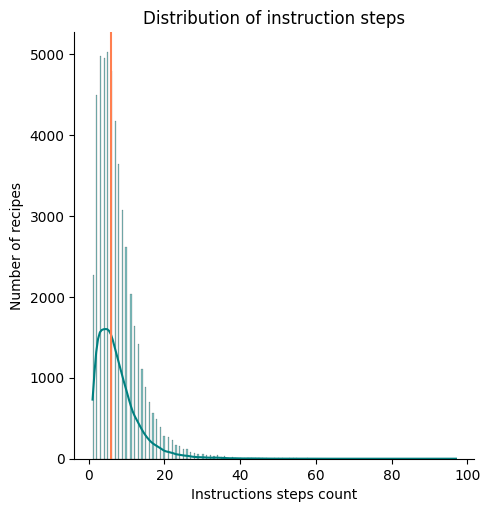

In [22]:
# Distribution of instruction steps

sns.displot(df_recipes, x="instructions_steps", kde=True, color="teal")
plt.axvline(x=df_recipes.instructions_steps.median(),color='coral')
plt.xlabel("Instructions steps count")
plt.ylabel("Number of recipes")
plt.title("Distribution of instruction steps")
plt.show()

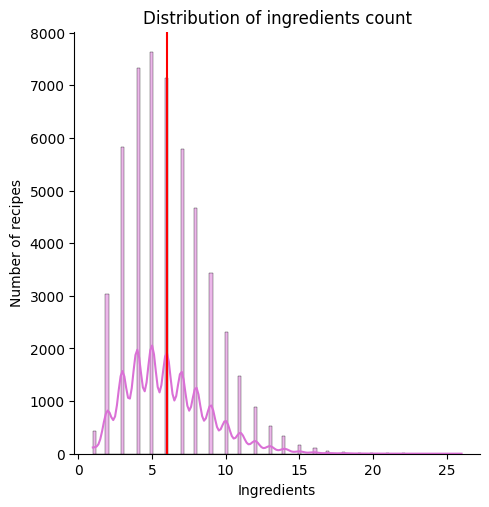

In [7]:
# Distribution of ingredients count

sns.displot(df_recipes, x="ingredients_count", kde=True, color="orchid")
plt.axvline(x=df_recipes.ingredients_count.median(),color='red')
plt.xlabel("Ingredients")
plt.ylabel("Number of recipes")
plt.title("Distribution of ingredients count")
plt.show()

In [23]:
# Creates pandas DataFrame, to save the nutritional values
df_nutr_summary_records = pd.DataFrame(index=['fat', 'sugar', 'saturates','salt'], 
                                    columns=['low','medium','high'])

# Fat 0g < 5g < 15g
df_nutr_summary_records.at['fat','low'] = len(df_recipes[(df_recipes['nutr_values_per100g_fat']>=0) & (df_recipes['nutr_values_per100g_fat']<=5)])
df_nutr_summary_records.at['fat','medium'] = len(df_recipes[(df_recipes['nutr_values_per100g_fat']>5) & (df_recipes['nutr_values_per100g_fat']<=15)])
df_nutr_summary_records.at['fat','high'] = len(df_recipes[(df_recipes['nutr_values_per100g_fat']>15)])

# Sugar 0g < 5g < 15g
df_nutr_summary_records.at['sugar','low'] = len(df_recipes[(df_recipes['nutr_values_per100g_sugars']>=0) & (df_recipes['nutr_values_per100g_sugars']<=5)])
df_nutr_summary_records.at['sugar','medium'] = len(df_recipes[(df_recipes['nutr_values_per100g_sugars']>5) & (df_recipes['nutr_values_per100g_sugars']<=15)])
df_nutr_summary_records.at['sugar','high'] = len(df_recipes[(df_recipes['nutr_values_per100g_sugars']>15)])

# Saturates 0g < 1.5g < 5g
df_nutr_summary_records.at['saturates','low'] = len(df_recipes[(df_recipes['nutr_values_per100g_saturates']>=0) & (df_recipes['nutr_values_per100g_saturates']<=1.5)])
df_nutr_summary_records.at['saturates','medium'] = len(df_recipes[(df_recipes['nutr_values_per100g_saturates']>1.5) & (df_recipes['nutr_values_per100g_saturates']<=5)])
df_nutr_summary_records.at['saturates','high'] = len(df_recipes[(df_recipes['nutr_values_per100g_saturates']>5)])

# Salt 0g < 0.3g < 1.5g
df_nutr_summary_records.at['salt','low'] = len(df_recipes[(df_recipes['nutr_values_per100g_salt']>=0) & (df_recipes['nutr_values_per100g_salt']<=0.3)])
df_nutr_summary_records.at['salt','medium'] = len(df_recipes[(df_recipes['nutr_values_per100g_salt']>0.3) & (df_recipes['nutr_values_per100g_salt']<=1.5)])
df_nutr_summary_records.at['salt','high'] = len(df_recipes[(df_recipes['nutr_values_per100g_salt']>1.5)])

df_nutr_summary_records

,low,medium,high
fat,22192,10458,18585
sugar,22034,11149,18052
saturates,22769,10938,17528
salt,25948,14324,10963


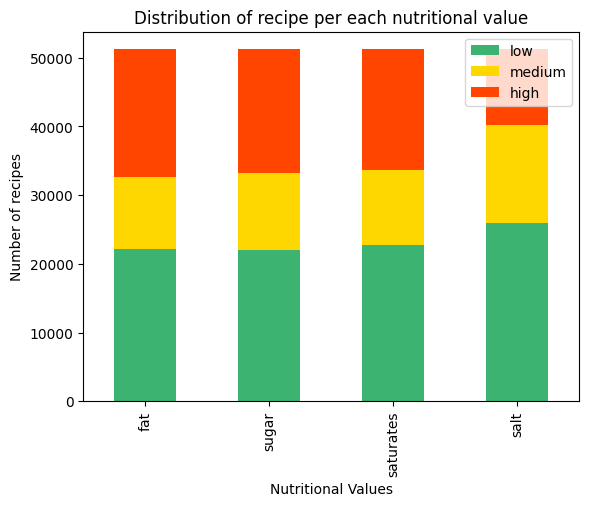

In [24]:
# create stacked bar chart for nutrition summary
df_nutr_summary_records.plot(kind='bar', stacked=True, color=['mediumseagreen', 'gold', 'orangered'])
 
# labels for x & y axis
plt.xlabel('Nutritional Values')
plt.ylabel('Number of recipes')
 
# title of plot
plt.title('Distribution of recipe per each nutritional value')
plt.show()

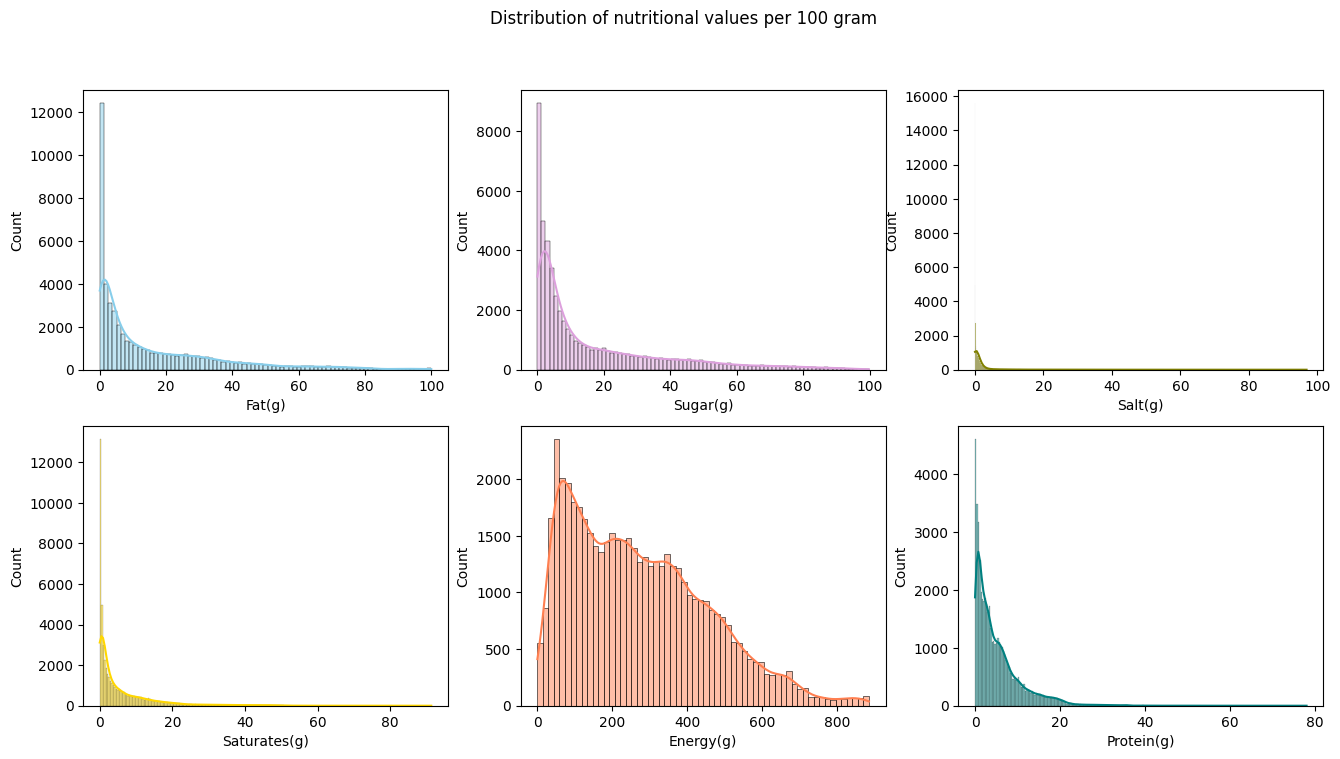

In [25]:
# Distribution of nutritional values per 100 gram
fig, axs = plt.subplots(2, 3, figsize=(16, 8))

a1 = sns.histplot(data=df_recipes, x="nutr_values_per100g_fat", kde=True, color="skyblue", ax=axs[0, 0])
a1.set(xlabel="Fat(g)")

a2 = sns.histplot(data=df_recipes, x="nutr_values_per100g_sugars", kde=True, color="plum", ax=axs[0, 1])
a2.set(xlabel="Sugar(g)")

a3 = sns.histplot(data=df_recipes, x="nutr_values_per100g_salt", kde=True, color="olive", ax=axs[0, 2])
a3.set(xlabel="Salt(g)")

a4 = sns.histplot(data=df_recipes, x="nutr_values_per100g_saturates", kde=True, color="gold", ax=axs[1, 0])
a4.set(xlabel="Saturates(g)")

a5 = sns.histplot(data=df_recipes, x="nutr_values_per100g_protein", kde=True, color="teal", ax=axs[1, 2])
a5.set(xlabel="Protein(g)")

a6 = sns.histplot(data=df_recipes, x="nutr_values_per100g_energy", kde=True, color="coral", ax=axs[1, 1])
a6.set(xlabel="Energy(g)")

fig.suptitle("Distribution of nutritional values per 100 gram")
plt.show()

In [8]:
# Create wordcloud
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

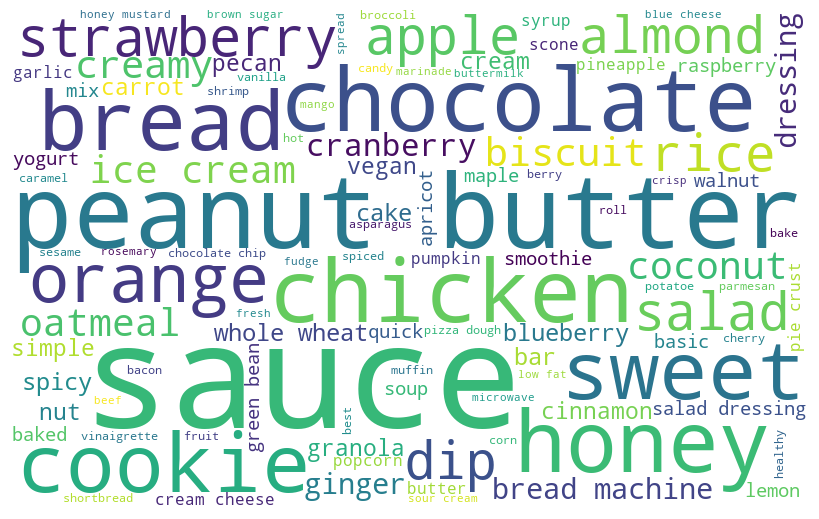

In [25]:
# Wordcloud of recipe titles

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(["recipe", "easy", "homemade"])

# iterate through the csv file
for val in df_recipes.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
#plt.show()
plt.savefig('generated/wordcloud_title.png')

In [14]:
words_title = WordCloud().process_text(comment_words)
words_title_df = pd.DataFrame(list(words_title.items()), columns=['Title', 'Frequency'])
words_title_df = words_title_df.sort_values(by=['Frequency'],ascending=False)
words_title_df.head(20)

,Title,Frequency
6,recipe,2239
19,sauce,1168
9063,peanut butter,1115
17,easy,1068
144,homemade,821
16,chocolate,788
9,chicken,781
7,honey,761
215,cookie,701
173,sweet,693


In [26]:
# Wordcloud of ingredients

comment_words_ingredients = ''
stopwords = set(STOPWORDS)
stopwords.update(["recipe", "without", "bottled"])

# iterate through the csv file
for val in df_recipes.ingredients_simple:
     
    # typecaste each val to string
    val = str(val)

    #remove extra Json strings
    val = val.replace("'text': ", "")
    val = val.replace("[{", "")
    val = val.replace("}]", "")
    val = val.replace("}, {", "")
    val = val.replace("''", "|")
    val = val.replace("\'", "")
    val = val.replace('\"', "")
 
    # split the value
    tokens = val.split('|')
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_ingredients += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size = 10).generate(comment_words_ingredients)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
#plt.show()

plt.savefig('generated/wordcloud_ingredients.png')
plt.close()

In [16]:
words = WordCloud().process_text(comment_words_ingredients)
words_df = pd.DataFrame(list(words.items()), columns=['Ingredient', 'Frequency'])
words_df = words_df.sort_values(by=['Frequency'],ascending=False)
words_df.head(20)

,Ingredient,Frequency
144,wheat flour,16211
142,leavening agents,10088
211,garlic powder,5378
251,vanilla extract,5311
159,lemon juice,4453
146,salt pepper,3872
235,butter sugars,3145
139,orange juice,2900
167,sugars salt,2873
158,salad dressing,2801


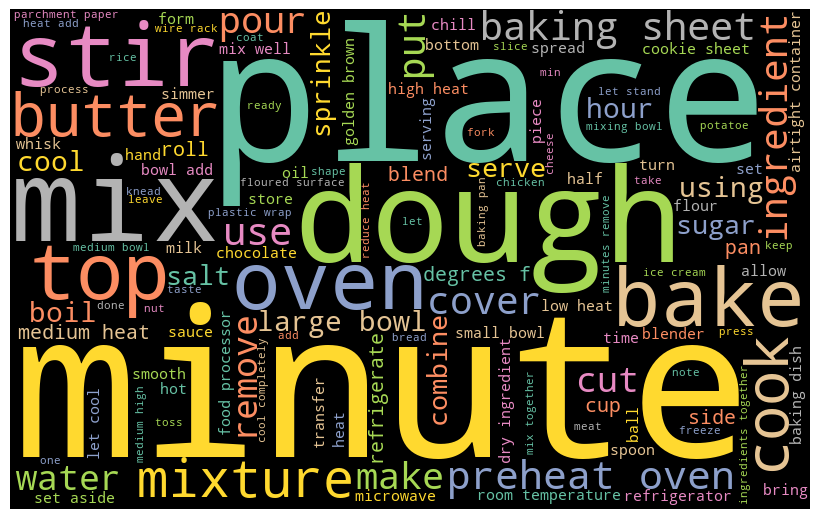

In [27]:
# Wordcloud of instructions

comment_words_instructions = ''
stopwords = set(STOPWORDS)
stopwords.update(["recipe", "without", "bottled"])

# iterate through the csv file
for val in df_recipes.instructions_simple:
     
    # typecaste each val to string
    val = str(val)

    #remove extra Json strings
    val = val.replace("'text': ", "")
    val = val.replace("[{", "")
    val = val.replace("}]", "")
    val = val.replace("}, {", "")
    val = val.replace("''", "|")
    val = val.replace("\'", "")
    val = val.replace('\"', "")
 
    # split the value
    tokens = val.split('|')
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words_instructions += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size = 10).generate(comment_words_instructions)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
#plt.show()
plt.savefig('generated/wordcloud_instructions.png')

In [18]:
#train, test and validation
df_recipes.partition.value_counts()

train    35867
val       7687
test      7681
Name: partition, dtype: int64